# Camera Calibration

Your name: Said Abdalrahim

Your ID number: 24177075

This task is not so difficult. I want to walk you through the steps of the calibration of your own camera using OpenCV. All of the code is provided for you, you only need to make tweaks. But please take the time to read the comments I have added below, as they describe the steps. Refer to the video on camera calibration.

<font color='blue'>
    
#### Task

Calibrate your mobile phone camera.
1. I have provided a pdf of a checkerboard pattern. Display it on your computer screen, and using your mobile phone camera, capture a bunch of images of the checker pattern (e.g., 7 or 8)
1. Transfer these to your computer, into the folder that this notebook is in (or in a subfolder)
1. Update the path in the code below to point to the images
1. Run the code to calibrate your camera!
1. Read the comments carefully to understand what's going on
1. Print the estimated camera matrix and distortion coefficients (code provided)
1. Draw all of your images, with the coordinate system and the corners overlaid (code provided)


In [8]:
import numpy as np
import cv2
import glob

# TODO: Point this to your list of images
images = glob.glob('checker_images/*.jpeg')

# termination criteria - don't worry about this too much. What we are doing here
# is setting the criteria by which the training iterations exit. We set a max number
# of iterations (we don't want it to run forever) plus an early exit when the error
# drops below a small value (eps)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# This is the number of vertices in the checkerboard pattern. This basically
# tells the findChessboardCorners function what it is looking for. This is correct
# if you use the accompanying checkerboard patter, but you must update this if
# you use your own.
grid_size = (10,7)

# As you know from the lectures, we need to know something physical about the
# calibration target. We need to  know where the corners are in our world 
# coordinate system. Well, let's make the top left corner of the calibration
# pattern our world coordinate system, and let's assume that each corner is
# one unit from the other corners - this last bit is a bit odd, but it has no
# impact on the calibration of the intrinsics. Therefore, our "object" points
# are (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0) (object in this case is the
# checkerboard pattern.
objp = np.zeros((grid_size[0]*grid_size[1],3), np.float32)
objp[:,:2] = np.mgrid[0:10,0:7].T.reshape(-1,2)

# When we detect the checkerboard pattern, we will be able to associate
# the image points in each image with the object points. This is a key
# step in calibration, that we are associating the image points with some
# known world points.
# In our case, where we have a single checker pattern that we image multiple
# times, the object points will always be the same. However, you could, in
# theory, have multiple checker patterns within the image, which would have
# different world coordinates. Hence, the algorithsm below expect an
# explicit object point list for each set of image points, even if that leads
# to repeated point lists.
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Let's store the images, also, so we can draw on them afterwards
imgs = []
# Now, we iterate through each checker image
for fname in images:
    # Read each file
    img = cv2.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, grid_size, None)
    
    # If found, add object points, image points (after refining them)
    # Sometimes the function fails to finde the checker corners. We
    # can just ignore images where it isn't found.
    if ret == True:
        # Create our list of object points. As mentioned above, this
        # will just be repeated for every image in our case.
        objpoints.append(objp)
        
        # The accuracy of our corners is very important. In the find checker
        # function above, we find the corners to pixel level accuracy.
        # However, we want to refine this to subpixel level (I hope you
        # covered subpixel detections in previous courses!)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        
        # Now append out image points
        imgpoints.append(corners2)
        
        # Store the images where we have found the checkers
        imgs.append(img)

        
# Now, at this point, objpoints and imgpoints contain a correspondence between 
# the 3D coordinates of the checker pattern (in a world coordinate that is origin'd
# at the top left of the checker pattern, as discussed). This is the crucial 3D-2D
# correspondence set that we need for calibration.

# Ensure that gray is defined
if len(images) > 0:
    img = cv2.imread(images[0])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    raise ValueError("No images found. Please check the path to your images.")

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [9]:
# Displaying required output
print(" Camera matrix:")
print(mtx)
  
print("\n Distortion coefficient:")
print(dist)

 Camera matrix:
[[2.92480288e+03 0.00000000e+00 6.49182304e+02]
 [0.00000000e+00 2.89405336e+03 6.26803863e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[ 1.18060520e-01  5.08997319e+00 -2.33606427e-02 -3.99413241e-02
  -6.97209473e+01]]


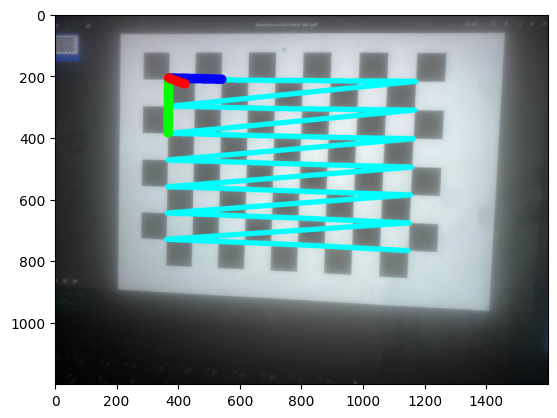

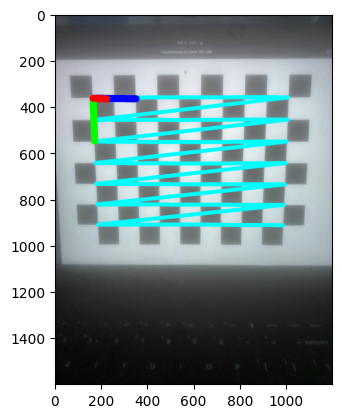

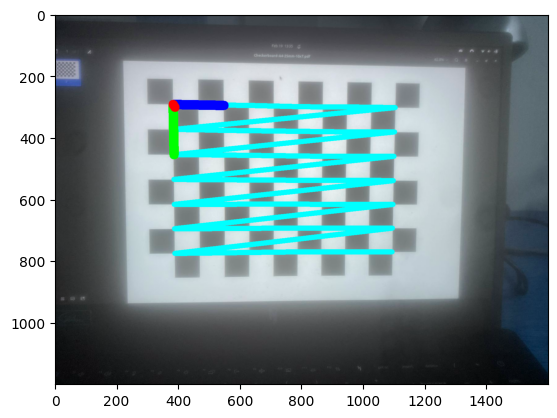

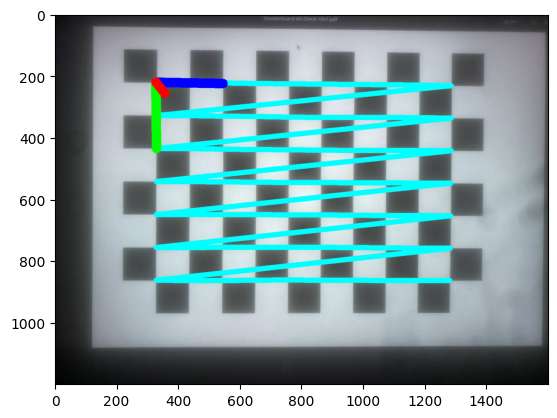

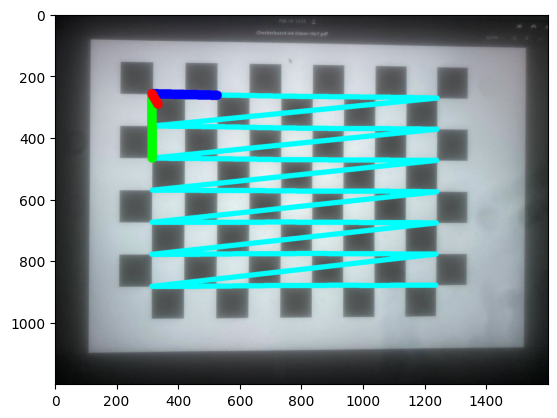

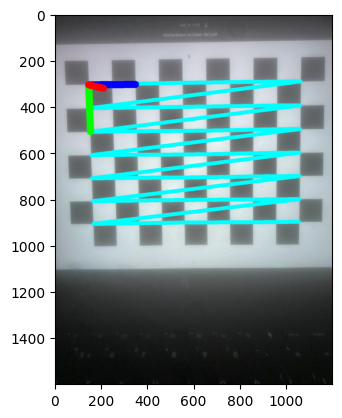

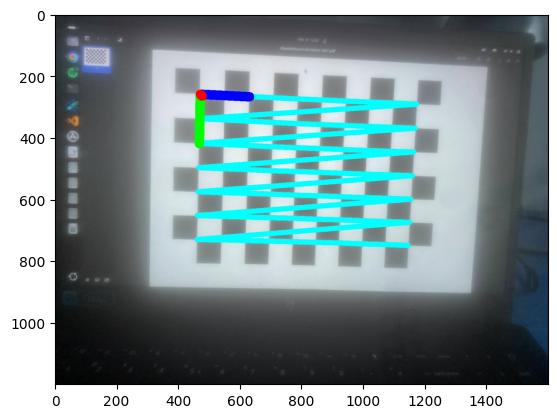

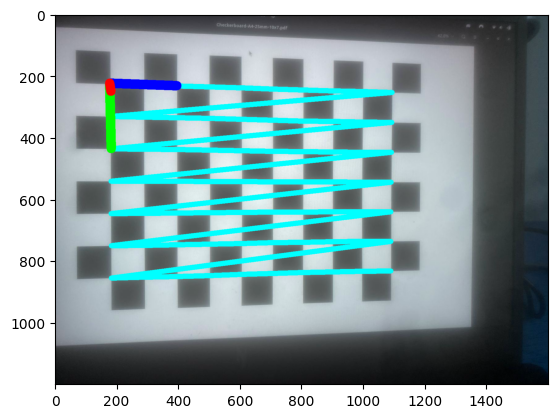

In [10]:
import matplotlib.pyplot as plt

# Draw and display the corners and the world coordinates axes
# You should see (cyan) lines connecting all of the corners
# and the world coordinate systems axes should be in red, green and blue
# (red = Z-axis, green = Y-axis, blue = X-axis)

# You can play with these until it looks nice
axes_thickness = 30
corner_line_thickness = 15

for i in range(0,len(objpoints)):
    cv2.polylines(imgs[i], np.array([imgpoints[i][:,0]]).astype(int), 
                  False, (0,255,255), corner_line_thickness)
    cv2.drawFrameAxes(imgs[i], mtx, dist, rvecs[i], tvecs[i], 2, axes_thickness)
    plt.figure()
    plt.imshow(imgs[i]);